# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
%matplotlib inline

##### 1. What does the data describe?

The data describes the rate of participation, scores in verbal and math section of the 
SAT achieved by each state in the country.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete. There are no missing values.

##### 3. Create a data dictionary for the dataset.

| Column Number |   Column Name    | Type      |Description                      |
|---            |                  |           |                                 |
|       1       |      State       |  String   | Abbreviated state names         |
|---            |                  |           |                                 |
|       2       |       Rate       |   int     | percent of participation in SAT |
|---            |                  |           |                                 | 
|       3       |       Verbal     |   int     | Average Math scores in SAT      |
|---            |                  |           |                                 |
|       4       |       Math       |    int    |Average Verbal scores in SAT     |
                                                                    



In [ ]:
# AT - Great data dictionary, but column number is not needed. And don't include blank rows

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [2]:
data = []
f = open('../assets/sat_scores.csv', 'r')
readerfile = csv.reader(f)
scores_data = list(readerfile)


##### 5. Print the data

In [3]:
scores_data

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

6. Extract a list of the labels from the data, and remove them from the data.

In [4]:
# The labels row is sliced from the data 
labels = scores_data[0]
labels

['State', 'Rate', 'Verbal', 'Math']

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [5]:
# List of state names extracted from the original data 
states_list = [scores_data[i][0] for i in range(1,len(scores_data)-1)]
states_list[:10]

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA']

##### 8. Print the types of each column

In [6]:
# prints the types of each and every value in each column
print("The type of 'States' column is:") 
for z in range(0,len(scores_data)):
    print(type(scores_data[z][0]))
    
print("The type of 'Rate' column is:")
for z in range(0,len(scores_data)):
    print(type(scores_data[z][1])) 
    
print("The type of 'Verbal' column is:")
for z in range(0,len(scores_data)):
    print(type(scores_data[z][2])) 
    
print("The type of 'Math' column is:")
for z in range(0,len(scores_data)):
    print(type(scores_data[z][3]))

The type of 'States' column is:
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
The type of 'Rate' column is:
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<t

In [29]:
# AT - Nice! We only need the type of the column though. You didn't need to do it for every element of the column

 9. Do any types need to be reassigned? If so, go ahead and do it.

In [30]:
#This contains the entire data without the labels and the numerical columns as integers
int_values=[]
int_values = [c[:1] + map(int,c[1:]) for c in scores_data[1:]]
int_values[:10]

[['CT', 82, 509, 510],
 ['NJ', 81, 499, 513],
 ['MA', 79, 511, 515],
 ['NY', 77, 495, 505],
 ['NH', 72, 520, 516],
 ['RI', 71, 501, 499],
 ['PA', 71, 500, 499],
 ['VT', 69, 511, 506],
 ['ME', 69, 506, 500],
 ['VA', 68, 510, 501]]

In [31]:
# AT - nice use of the map function!

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [32]:
new_dict_state = {key:value for key, value in zip(states_list,[int_values[i][1:]for i in range(0,len(int_values))])}
new_dict_state

{'AK': [51, 514, 510],
 'AL': [9, 559, 554],
 'AR': [6, 562, 550],
 'AZ': [34, 523, 525],
 'CA': [51, 498, 517],
 'CO': [31, 539, 542],
 'CT': [82, 509, 510],
 'DC': [56, 482, 474],
 'DE': [67, 501, 499],
 'FL': [54, 498, 499],
 'GA': [63, 491, 489],
 'HI': [52, 485, 515],
 'IA': [5, 593, 603],
 'ID': [17, 543, 542],
 'IL': [12, 576, 589],
 'IN': [60, 499, 501],
 'KS': [9, 577, 580],
 'KY': [12, 550, 550],
 'LA': [7, 564, 562],
 'MA': [79, 511, 515],
 'MD': [65, 508, 510],
 'ME': [69, 506, 500],
 'MI': [11, 561, 572],
 'MN': [9, 580, 589],
 'MO': [8, 577, 577],
 'MS': [4, 566, 551],
 'MT': [23, 539, 539],
 'NC': [65, 493, 499],
 'ND': [4, 592, 599],
 'NE': [8, 562, 568],
 'NH': [72, 520, 516],
 'NJ': [81, 499, 513],
 'NM': [13, 551, 542],
 'NV': [33, 509, 515],
 'NY': [77, 495, 505],
 'OH': [26, 534, 439],
 'OK': [8, 567, 561],
 'OR': [55, 526, 526],
 'PA': [71, 500, 499],
 'RI': [71, 501, 499],
 'SC': [57, 486, 488],
 'SD': [4, 577, 582],
 'TN': [13, 562, 553],
 'TX': [53, 493, 499],


In [ ]:
# AT - very nice! your code is very succint!

##### 11. Create a dictionary with the values for each of the numeric columns

In [9]:
values_dict = {key:value for key,value in zip(labels[1:4],[[int_values[i][j]for i in range(0,len(int_values))] 
                                                      for j in range(1,4)])}
print values_dict

{'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506]}


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [10]:
print "min and max of 'Rate' column is :", min(values_dict['Rate']), max(values_dict['Rate'])
print "min and max of 'Verbal' column is :", min(values_dict['Verbal']), max(values_dict['Verbal'])
print "min and max of 'Math' column is :", min(values_dict['Math']), max(values_dict['Math'])

min and max of 'Rate' column is : 4 82
min and max of 'Verbal' column is : 482 593
min and max of 'Math' column is : 439 603


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [11]:
def st_dev(name):
    return round(np.std(name),2)

print("Std_dev of Rate:", st_dev(values_dict['Rate']), "Std_dev of Math:", st_dev(values_dict['Math']), 
      "Std_dev of Verbal:", st_dev(values_dict['Verbal']))

('Std_dev of Rate:', 27.04, 'Std_dev of Math:', 35.67, 'Std_dev of Verbal:', 32.92)


In [ ]:
#Nice use of np.std, no need to write your own!

## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

In [12]:
# Numeric and statistics packages:
import numpy as np
import scipy.stats as stats

# Pandas handles dataset loading and manipulation:
import pandas as pd

# import the plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Initialize plotly notebook mode:
plotly.offline.init_notebook_mode()

# Setup matplotlib to display in notebook:
%matplotlib inline

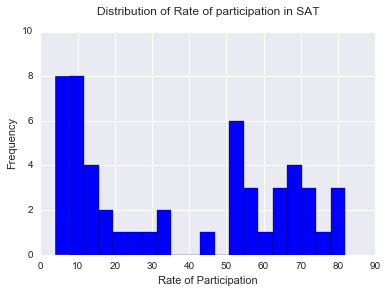

In [33]:
plt.hist(values_dict['Rate'], bins=20,color='blue')
plt.xlabel('Rate of Participation')
plt.ylabel('Frequency')
plt.axis([0, 90, 0, 10])
plt.grid(True)
plt.title("Distribution of Rate of participation in SAT\n")
plt.show()


This is a bimodal distribution. There are 16 states(30% of states) that have less than 10% of students taking the SAT. 

##### 15. Plot the Math distribution

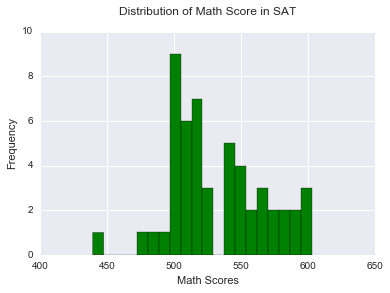

In [34]:
plt.hist(values_dict['Math'], bins=20,color='Green')
plt.xlabel('Math Scores')
plt.ylabel('Frequency')
plt.axis([400, 650, 0, 10])
plt.grid(True)
plt.title("Distribution of Math Score in SAT\n")

##### 16. Plot the Verbal distribution

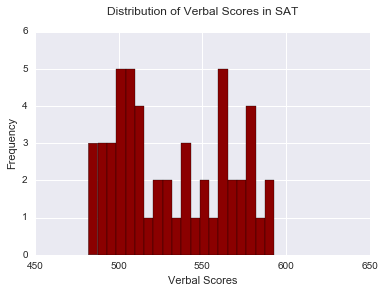

In [15]:
plt.hist(values_dict['Verbal'], bins=20,color='darkred')
plt.xlabel('Verbal Scores')
plt.ylabel('Frequency')
plt.axis([450, 650, 0, 6])
plt.grid(True)
plt.title("Distribution of Verbal Scores in SAT\n")

##### 17. What is the typical assumption for data distribution?

The typical assumption is that the data is normally distributed

##### 18. Does that distribution hold true for our data?

No

In [35]:
# AT - technically correct, but we could use a little more detail.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

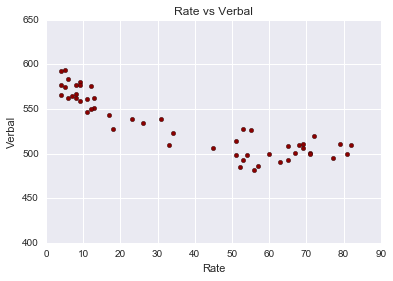

In [36]:
plt.scatter(values_dict['Rate'], values_dict['Verbal'], c='darkred')
plt.xlabel('Rate')
plt.ylabel('Verbal')
plt.title("Rate vs Verbal")
plt.axis([0, 90, 400, 650])
plt.grid(True)
plt.show()

The verbal scores follow the same trend as the math scores with the highest participating states acheving the lowest scores.

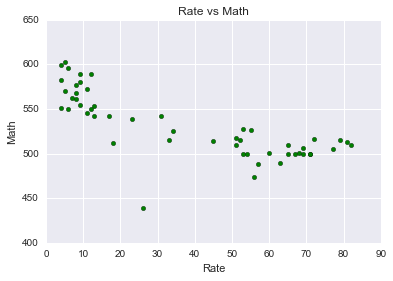

In [37]:
plt.scatter(values_dict['Rate'], values_dict['Math'], c='green')
plt.xlabel('Rate')
plt.ylabel('Math')
plt.title("Rate vs Math")
plt.grid(True)
plt.show()

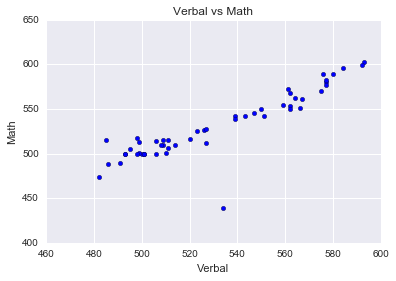

In [18]:
plt.scatter(values_dict['Verbal'], values_dict['Math'], c='blue')
plt.xlabel('Verbal')
plt.ylabel('Math')
plt.title("Verbal vs Math")
plt.grid(True)
plt.show()

There is a positive correlation between the verbal and math scores except Ohio which is an outlier. Ohio has the lowest math scores.

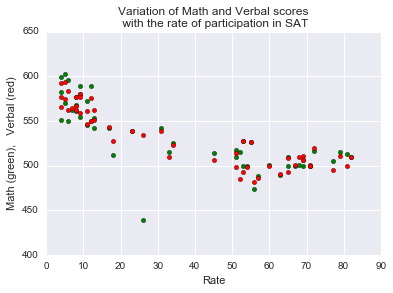

In [19]:
plt.scatter(values_dict['Rate'], values_dict['Math'], c='green')
plt.scatter(values_dict['Rate'], values_dict['Verbal'], c='red')
plt.xlabel('Rate')
plt.title('Variation of Math and Verbal scores\n with the rate of participation in SAT')
plt.axis([0, 90, 400, 650])
plt.ylabel('Math (green),   ''Verbal (red)')
plt.show()

The math and verbal scores are lower in states where the participation rate
is one of the highest. Ohio is an outlier though only 25% of students participate in SAT
the math score is one of the lowest in the country.

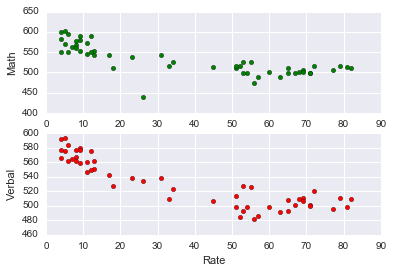

In [20]:
#multiple plots in one figure
plt.figure(1)
plt.subplot(211)
plt.scatter(values_dict['Rate'], values_dict['Math'], c='green')
plt.axis([0, 90, 400, 650])
plt.xlabel('Rate')
plt.ylabel('Math')

plt.subplot(212)
plt.scatter(values_dict['Rate'], values_dict['Verbal'], c='red')
plt.xlabel('Rate')
plt.ylabel('Verbal')




There is a negative correlation between the rate of participation in SAT and the math and \nverbal scores. More number of students taking the SAT may be influencing the average due to high percent of students achieving lower scores thereby bringing down the average.

##### 20. Are there any interesting relationships to note?

1. When the rate of participation of students in writing SAT is low, the math and verbal scores are 
high. This indicates that the best students appear for SAT from states with low participating numbers.
For states with high participation rates, the scores are relatively low. This suggests that the average
score is brought down due to low performing students. 
This suggests that variable number of students take 
the SAT and may be mandatory in some states while not in others.

2. Students with higher math scores typically get a good verbal score. Math and verbal
scores are less in states where lot of students take the exam.

In [ ]:
# AT - good observations

##### 21. Create box plots for each variable. 

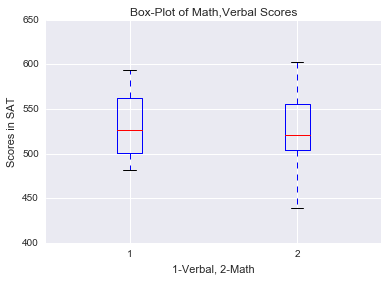

In [21]:
data = [values_dict['Verbal'],values_dict['Math']]
plt.boxplot(data)

plt.grid(True)
plt.xlabel('1-Verbal, 2-Math')
plt.ylabel('Scores in SAT')
plt.title("Box-Plot of Math,Verbal Scores")

plt.show()


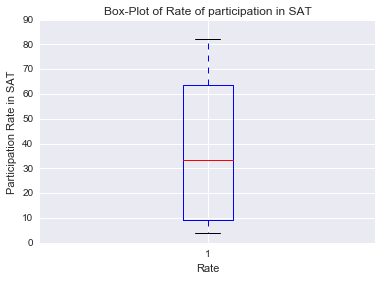

In [22]:
data = [values_dict['Rate']]
plt.boxplot(data)

plt.grid(True)
plt.xlabel('Rate')
plt.ylabel('Participation Rate in SAT')
plt.title("Box-Plot of Rate of participation in SAT")

plt.show()

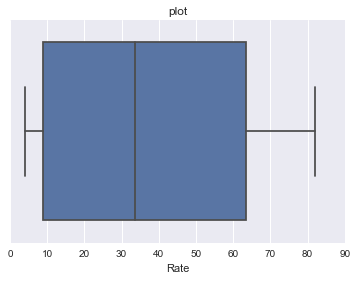

In [23]:
data = [values_dict['Rate']]
sns.boxplot(data)
plt.xlabel('Rate')
plt.title('plot')
plt.show()


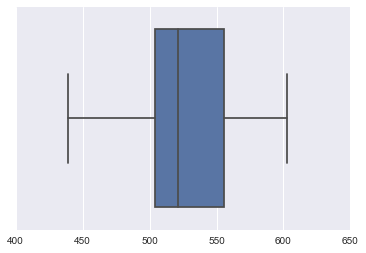

In [24]:
data = [values_dict['Math']]
sns.boxplot(data)

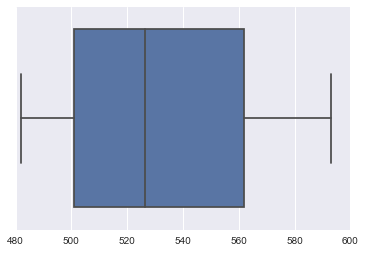

In [25]:
data = [values_dict['Verbal']]
sns.boxplot(data)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

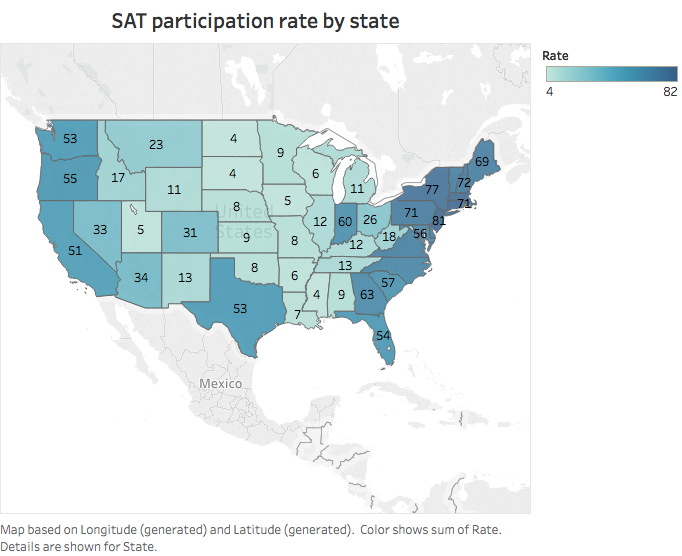

In [26]:
from IPython.display import Image
Image('../assets/Rate_heatmap.png')

There are 16 states(30% of states) that have less than 10% of students 
taking the SAT. Most of these states are in the central, midwest region of US.
The states in the northeast have the highest percent of students taking the exam.

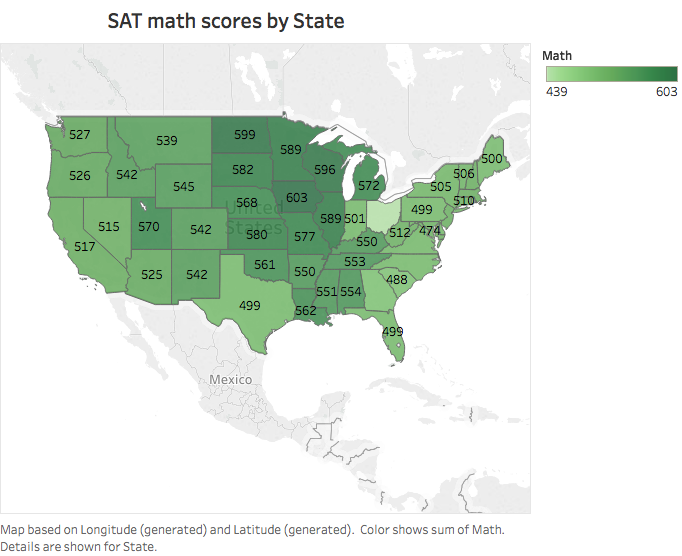

In [27]:
from IPython.display import Image
Image('../assets/Math_Scores_heatmap.png')

1.The students in the central to midwest region of the US achieve the highest math scores 
while the northeast region states have the lowest scores.
2.North Dakota has one of the nations lowest participation rate, but takes the lead in Math and 
verba scores. The primary reason is because North Dakota primarily uses ACT instead of SAT- which
means only the best and well prepared high schoolers take the SAT thereby scoring higher.
3.ref: http://blog.prepscholar.com/average-sat-scores-by-state-most-recent'''

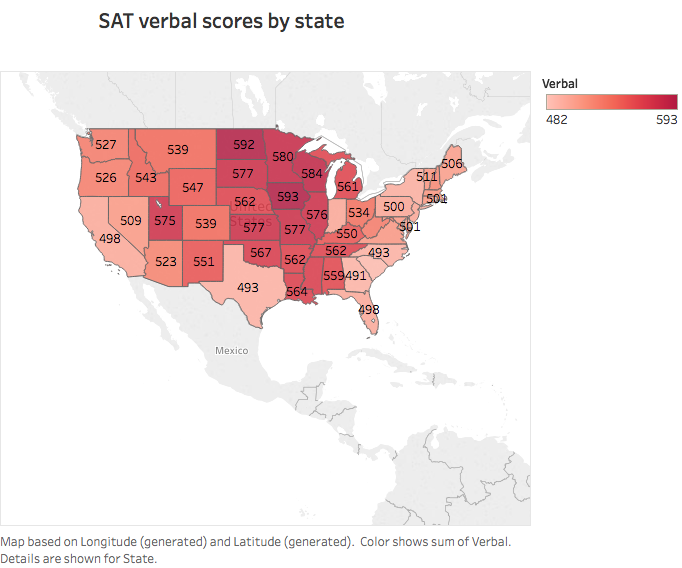

In [28]:
from IPython.display import Image
Image('../assets/Verbal_Scores_heatmap.png')

The verbal scores follow the same trend as the math scores with the northeast states 
achieving the lowest scores.

Conclusion:
1. In general there is a negative correlation between the rate of participation in SAT and the 
verbal and math scores. This indicates that states with low participation achieve the highest scores. 
2. Most of the states in the modwest to central region achieve the highest scores with the least participation.
3. The states in the northeast region have the lowest scores with the highest participation rates. The scores are lower due to the higher number of students taking the test which is brought down by the low scoring students. 
4. Math and verbal scores are positively correlated with math score increasing with verbal score except for Ohio which has the lowest math score in the country.


Score | 18/18
------|------
Identify: Discuss Data        | 3       
Acquire: Load Data with Python        | 3
Parse: Print Data            | 3
Mine: Sort Data                | 3
Refine: Analyze Data                | 3
Present: Visualize Data/Tableau            | 3
Bonus! Present: Create blog post summary | 0 

Great project, each plot could use one or two sentence describing it, even thoug yu